In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

In [3]:
# For division
from __future__ import division

In [12]:
# List of Tech_stocks for analytics
tech_list = ['AAL','AAP','UBER']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-3,end.month,end.day)
print(start)

#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)


2016-11-17 00:00:00


In [13]:
UBER.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-10,45.000000,41.060001,42.000000,41.570000,186322500,41.570000
2019-05-13,39.240002,36.080002,38.790001,37.099998,79442400,37.099998
2019-05-14,39.959999,36.849998,38.310001,39.959999,46661100,39.959999
2019-05-15,41.880001,38.950001,39.369999,41.290001,36086100,41.290001
2019-05-16,44.060001,41.250000,41.480000,43.000000,38115500,43.000000


In [14]:
UBER.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-11,27.209999,26.230000,27.030001,27.139999,41138100,27.139999
2019-11-12,27.660000,26.660000,27.379999,26.700001,37095400,26.700001
2019-11-13,26.820000,26.139999,26.469999,26.709999,32678300,26.709999
2019-11-14,26.860001,25.665001,26.799999,25.990000,27893900,25.990000
2019-11-15,26.799999,25.955000,26.180000,26.790001,41236200,26.790001


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-11-17 to 2019-11-15
Data columns (total 6 columns):
High         754 non-null float64
Low          754 non-null float64
Open         754 non-null float64
Close        754 non-null float64
Volume       754 non-null float64
Adj Close    754 non-null float64
dtypes: float64(6)
memory usage: 41.2 KB


In [9]:
AAPL.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,754.000000,754.000000,754.000000,754.000000,7.540000e+02,754.000000
mean,177.728249,174.725159,176.170942,176.298714,2.981164e+07,172.527740
std,32.091705,31.333357,31.707298,31.736523,1.263816e+07,32.915774
min,110.029999,108.250000,109.169998,109.110001,1.136200e+07,104.228821
25%,155.152500,153.007500,154.119999,153.990005,2.121008e+07,149.697342
50%,175.119995,172.870003,174.080002,174.245003,2.640160e+07,169.844856
75%,200.822506,198.024998,199.182499,199.407505,3.443050e+07,197.423592
max,265.779999,263.010010,263.750000,265.760010,1.119850e+08,265.760010


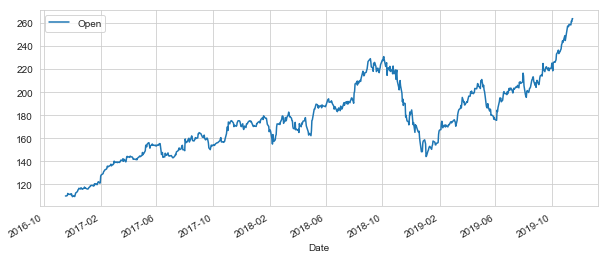

In [11]:
AAPL['Open'].plot(legend = True, figsize = (10,4))

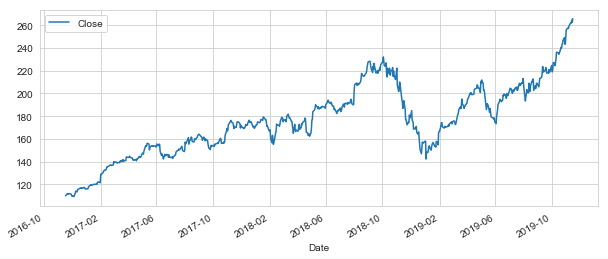

In [12]:
AAPL['Close'].plot(legend=True, figsize=(10,4))

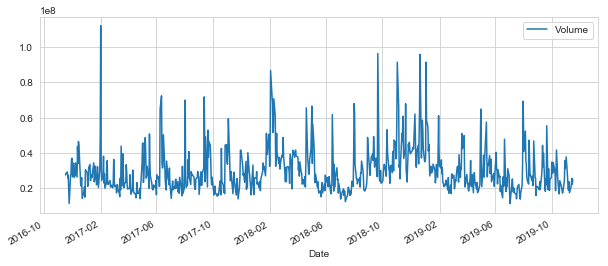

In [13]:
# Now let's plot the total volume of stock being traded each day over the past year
AAPL['Volume'].plot(legend=True, figsize=(10,4))

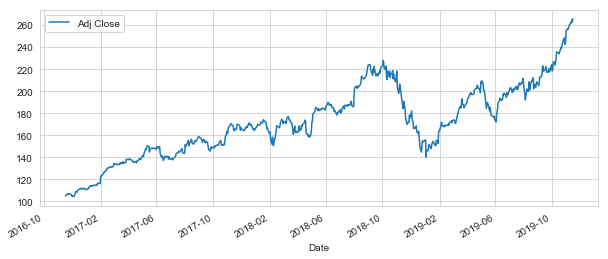

In [14]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

In [15]:
close = AAPL['Close']
MA_day = [10,20,50]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = close.rolling(window = ma).mean()

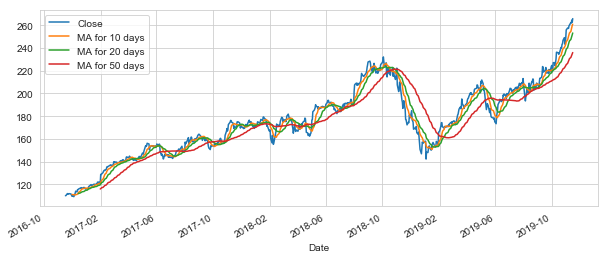

In [16]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

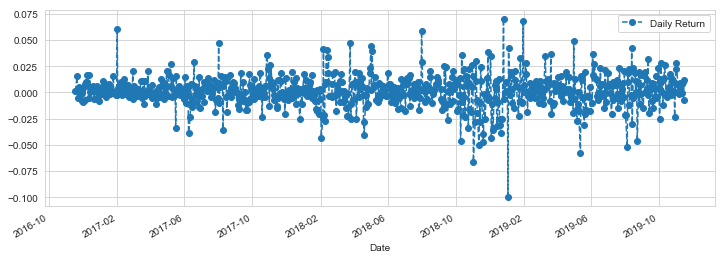

In [17]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

In [18]:
dfreg = AAPL.loc[:,['Adj Close','Volume',]]
dfreg['HL_PCT'] = (AAPL['High']-AAPL['Low']) / AAPL['Close'] * 100.0
dfreg['PCT_change'] = (AAPL['Close'] - AAPL['Open']) / AAPL['Open'] * 100

In [19]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2016-11-17,105.031227,27632000.0,1.382444,0.127492
2016-11-18,105.136322,28428900.0,0.799561,0.309876
2016-11-21,106.731606,29264600.0,1.772125,1.462042
2016-11-22,106.798477,25965500.0,0.912340,-0.133983
2016-11-23,106.253975,27426400.0,1.060865,-0.116736


In [20]:
#df.ewm(span=60).mean()
df = AAPL

In [21]:
train_start_date = '2009-01-01'
train_end_date = '2017-12-31'
test_start_date = '2018-01-01'
test_end_date = datetime.now()
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]


In [21]:
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

In [22]:
def offset_value(test_start_date, test, df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'Adj Close']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += df.loc[temp_date, 'Adj Close']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

In [24]:
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
prediction_list = []

In [52]:
#from treeinterpreter import treeinterpreter as ti
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor